# 回归决策树
决策树通过使用 DecisionTreeRegressor 类也可以用来解决回归问题。


## 原理

所谓回归，就是根据特征向量来决定对应的输出值。回归树就是将特征空间划分成若干单元，每一个划分单元有一个特定的输出。因为每个结点都是“是”和“否”的判断，所以划分的边界是平行于坐标轴的。对于测试数据，我们只要按照特征将其归到某个单元，便得到对应的输出值

如在分类设置中，拟合方法将数组X和数组y作为参数，只有在这种情况下，y数组预期才是浮点值:
![回归决策树](../images/回归决策树.png)

如现在对一个新的向量(6,6)决定它对应的输出。第一维分量6介于5和8之间，第二维分量6小于8，根据此决策树很容易判断(6,6)所在的划分单元，其对应的输出值为c3.

划分的过程也就是建立树的过程，每划分一次，随即确定划分单元对应的输出，也就多了一个结点。当根据停止条件划分终止的时候，最终每个单元的输出也就确定了，也就是叶结点。

## 回归决策树的构建举例
下表为训练数据集，特征向量只有一维，根据此数据表建立回归决策树。

|x | 1 | 2 |  3 | 4 | 5| 6 | 7 | 8 |9 | 10|
|-|-|-|-|-|-|-|-|-|-|-|
|y |5.56 | 5.7|5.91| 6.4 | 6.8| 7.05| 8.9|8.7 | 9| 9.05|

在本数据集中，只有一个特征变量，最优切分变量自然是x。接下来考虑9个切分点（切分变量两个相邻取值区间内任一点均可），

根据式(1.2)计算每个待切分点的损失函数值：

损失函数为

 
$$ L(j,s) = \sum_{x_i\in R_1(j,s)} (y_i-\hat{c_1})^2 + \sum_{x_i\in R_2(j,s)} (y_i-\hat{c_2})^2 $$
 

其中 

 $$ \hat{c_1} = \frac{1}{N_1} \sum_{x_i\in R_1(j,s)} y_i $$

当s=1.5时，两个子区域 $\small R_1=\left \{ 1 \right \}$，$  \small R_2=\left \{ 2,3,4,5,6,7,8,9,10 \right \}$，$   \small c_1=5.56 $，$  \small c_2=\frac{1}{9}(5.7+5.91+6.4+6.8+7.05+8.9+8.7+9+9.05)=7.5$。

同理，得到其他各切分点的子区域输出值，列表如下

|s |1.5 | 2.5| 3.5 |4.5 | 5.5 | 6.5 |7.5 | 8.5| 9.5|
|-|-|-|-|-|-|-|-|-|-|
|c1|5.56.|5.63| 5.72.| 5.89.| 6.07.| 6.24.| 6.62| 6.88| 7.11|
|c2| 7.5.|7.73| 7.99| 8.25 | 8.54| 8.91| 8.92 | 9.03| 9.05|

计算损失函数值，找到最优切分点

当s=1.5时， $L(1.5) = (5.56-5.56)^2+[(5.7-7.5)^2+(5.991-7.5)^2+...(9.05-7.5)^2]$   

同理，计算得到其他各切分点的损失函数值，列表如下

|s.|1.5|2.5 |3.5| 4.5|5.5|6.5|7.5| 8.5| 9.5|
|-|-|-|-|-|-|-|-|-|-|
|L(s).|15.72.|12.07.|8.36.| 5.78.| 3.91.|1.93.| 8.01 | 11.73|15.74|

易知，取s=6.5时，损失函数值最小。因此，第一个划分点为(j=x,s=6.5).后面同理

 假设两次划分后即停止，则最终生成的回归树为：
 
 $$ T=\begin{cases}
5.72  ,\quad x\leq 3.5\\
6.75 , \quad 3.5<x\leq6.5\\
8.91 , \quad x>6.5
\end{cases}$$

## 代码中调用
下面是在代码中的简单使用

In [1]:
%matplotlib inline
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

## 详细介绍
sklearn中DecisionTreeRegressor的主要参数与分类决策树差异不大.
唯一不太一样的是,在回归决策树中只实现了优化的gini决策树,而无法使用基于信息熵的决策树

**关于超参数的介绍,我们可以直接借用在分类决策树中的介绍**
**在sklearn中我们可以用来提高决策树泛化能力的超参数主要有**
 - max_depth:树的最大深度,也就是说当树的深度到达max_depth的时候无论还有多少可以分支的特征,决策树都会停止运算.
 - min_samples_split: 分裂所需的最小数量的节点数.当叶节点的样本数量小于该参数后,则不再生成分支.该分支的标签分类以该分支下标签最多的类别为准
 - min_samples_leaf; 一个分支所需要的最少样本数,如果在分支之后,某一个新增叶节点的特征样本数小于该超参数,则退回,不再进行剪枝.退回后的叶节点的标签以该叶节点中最多的标签你为准
 - min_weight_fraction_leaf: 最小的权重系数
 - max_leaf_nodes:最大叶节点数,None时无限制,取整数时,忽略max_depth
    
    
下面的代码主要是对决策树最大深度与过拟合之间关系的探讨,可以看出对于最大深度对拟合关系影响.
与分类决策树一样的地方在于,最大深度的增加虽然可以增加对训练集拟合能力的增强,但这也就可能意味着其泛化能力的下降

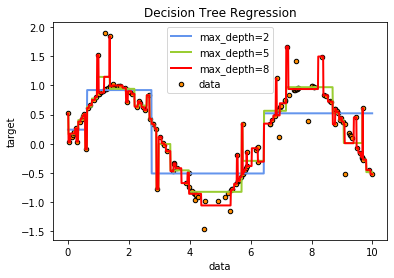

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(10 * rng.rand(160, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - rng.rand(32)) # 每五个点增加一次噪音

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="r", label="max_depth=8", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

从上面的测试可以看出随着决策树最大深度的增加,决策树的拟合能力不断上升。

在这个例子中一共有160个样本,对于最简单的max_dpeth = 2 的决策树而言,其明显不能很好的拟合我们的已有数据。
但是当最大深度为8(大于lg(200))时,我们的决策树已经不仅仅拟合了我们的正确样本,同时也拟合了**我们添加的噪音**,这导致了其泛化能力的下降。
因此对于决策树而言，选择合适的最大深度十分重要

## 最大深度与训练误差测试误差的关系

下面我们进行对于不同的最大深度决策树的训练误差与测试误差进行绘制.
当然你也可以通过改变其他可以控制决策树生成的超参数进行相关测试.

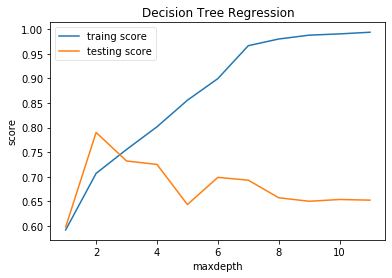

In [3]:
from sklearn import model_selection
def creat_data(n):
    np.random.seed(0)
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    noise_num=(int)(n/5)
    y[::5] += 3 * (0.5 - np.random.rand(noise_num)) # 每第5个样本，就在该样本的值上添加噪音
    return model_selection.train_test_split(X, y,test_size=0.25,random_state=1)
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
X_train,X_test,y_train,y_test=creat_data(200)    
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

由上图我们可以看出,当我们使用train_test进行数据集的分割的时候,最大深度2即为我们需要的最佳超参数.
同样的你也可以对其他超参数进行测试,或者换用cv进行测试,再或者使用hyperopt or auto-sklearn等神器.
刚刚提到的其他有关内容,我会在之后的[CSDN专栏-剑指数据科学](https://fonttian.blog.csdn.net/column/info/16266)中进行介绍,你可以关注我的博客并接收相关推送。

## 参考资料
 - [sklearn官方文档:决策树](http://scikit-learn.org/stable/modules/tree.html)
 - [sklearn官方文档:不同最大深度决策树拟合能力的比较](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)
 - [决策树-回归问题](https://www.cnblogs.com/diyigechengxu/p/10690621.html)
 - 《python大战机器学习 数据科学家的一个小目标》 华校专,王正林编著